### Home Value Analysis
This project delves into predicting home values using Multiple Linear Regression. It aims to understand the train-test process of machine learning for accurate predictions, evaluate model fit through various methods including kernel density plots, and introduce variable selection techniques such as Recursive Feature Selection and LASSO regression to identify influential predictors. Through data analysis, this project aims to uncover the key factors affecting home value predictions.

In [119]:
# Importing necessary libraries
import pandas as pd  # Pandas for data manipulation
import numpy as np  # Numpy for numerical computations

In [120]:
# Reading the data from the CSV file into a pandas DataFrame
Housingdf = pd.read_csv("HousingData.csv")

In [121]:
# Displaying the first few rows of the DataFrame
print(Housingdf.head())

        control  smsa  metro  msa360  msa520  msa875  msa1120  msa1600  \
0  600000000000   360      1       1       0       0        0        0   
1  100000000000   360      0       1       0       0        0        0   
2  110000000000   360      0       1       0       0        0        0   
3  390000000000   360      0       1       0       0        0        0   
4  500000000000   360      0       1       0       0        0        0   

   msa1680  msa1920  ...  hhmar  hhblack  hhmale  hhmove  hhmov  hhmovsq  \
0        0        0  ...      1        0       0    2010      1        1   
1        0        0  ...      1        0       1    2001     10      100   
2        0        0  ...      1        0       1    2010      1        1   
3        0        0  ...      1        0       0    2003      8       64   
4        0        0  ...      0        0       1    1989     22      484   

    hinc  lnhinc  lnperhinc  perhinc  
0  38178      11         11    70670  
1  42000      11    

In [122]:
# Printing concise summary information about the DataFrame
print(Housingdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7764 entries, 0 to 7763
Data columns (total 67 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   control     7764 non-null   int64
 1   smsa        7764 non-null   int64
 2   metro       7764 non-null   int64
 3   msa360      7764 non-null   int64
 4   msa520      7764 non-null   int64
 5   msa875      7764 non-null   int64
 6   msa1120     7764 non-null   int64
 7   msa1600     7764 non-null   int64
 8   msa1680     7764 non-null   int64
 9   msa1920     7764 non-null   int64
 10  msa2160     7764 non-null   int64
 11  msa2800     7764 non-null   int64
 12  msa3360     7764 non-null   int64
 13  msa3760     7764 non-null   int64
 14  msa4480     7764 non-null   int64
 15  msa5000     7764 non-null   int64
 16  msa5080     7764 non-null   int64
 17  msa5120     7764 non-null   int64
 18  msa5380     7764 non-null   int64
 19  msa5600     7764 non-null   int64
 20  msa5640     7764 non-null   in

In [123]:
# Printing the list of column names in the DataFrame
print(Housingdf.columns.tolist())

['control', 'smsa', 'metro', 'msa360', 'msa520', 'msa875', 'msa1120', 'msa1600', 'msa1680', 'msa1920', 'msa2160', 'msa2800', 'msa3360', 'msa3760', 'msa4480', 'msa5000', 'msa5080', 'msa5120', 'msa5380', 'msa5600', 'msa5640', 'msa5720', 'msa5775', 'msa6160', 'msa6200', 'msa6280', 'msa6780', 'msa7040', 'msa7240', 'msa7320', 'msa7360', 'msa7400', 'msa7600', 'msa8280', 'msa8840', 'value', 'lnvalue', 'hprice', 'lnhprice', 'houseser', 'lnhouseser', 'airsys', 'baths', 'bedrms', 'built', 'ageunit', 'ageunitsq', 'crack', 'fplwk', 'garage', 'leak', 'porch', 'hown', 'per', 'hhage', 'hhagesq', 'hhgrad', 'hhmar', 'hhblack', 'hhmale', 'hhmove', 'hhmov', 'hhmovsq', 'hinc', 'lnhinc', 'lnperhinc', 'perhinc']


In [124]:
# Setting the display format for floating-point numbers to two decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [125]:
# Selecting a subset of columns from the DataFrame
data = Housingdf[['value', 'msa360', 'msa520', 'msa875', 'msa1120', 'msa1600', 'msa1680', 'msa1920',
                  'msa2160', 'msa2800', 'msa3360', 'msa3760', 'msa4480', 'msa5000', 'msa5080', 'msa5120',
                  'msa5380', 'msa5600', 'msa5640', 'msa5720', 'msa5775', 'msa6160', 'msa6200', 'msa6280',
                  'msa6780', 'msa7040', 'msa7240', 'msa7320', 'msa7360', 'msa7400', 'msa7600', 'msa8280',
                  'msa8840', 'metro', 'hown', 'hhblack', 'hinc', 'per', 'bedrms', 'built', 'leak', 'houseser',
                  'hhmov', 'fplwk']]

In [126]:
# Displaying descriptive statistics of the selected data
print(data.describe())

           value  msa360  msa520  msa875  msa1120  msa1600  msa1680  msa1920  \
count    7764.00 7764.00 7764.00 7764.00  7764.00  7764.00  7764.00  7764.00   
mean   343149.74    0.02    0.02    0.01     0.03     0.06     0.02     0.02   
std    352510.10    0.15    0.13    0.12     0.17     0.23     0.14     0.15   
min         2.00    0.00    0.00    0.00     0.00     0.00     0.00     0.00   
25%    140000.00    0.00    0.00    0.00     0.00     0.00     0.00     0.00   
50%    250000.00    0.00    0.00    0.00     0.00     0.00     0.00     0.00   
75%    425000.00    0.00    0.00    0.00     0.00     0.00     0.00     0.00   
max   4400000.00    1.00    1.00    1.00     1.00     1.00     1.00     1.00   

       msa2160  msa2800  ...    hown  hhblack       hinc     per  bedrms  \
count  7764.00  7764.00  ... 7764.00  7764.00    7764.00 7764.00 7764.00   
mean      0.06     0.02  ...    0.92     0.12   93136.59    2.70    3.12   
std       0.24     0.12  ...    0.28     0.32   903

In [127]:
# Importing necessary modules for machine learning, model evaluation, and data visualization
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
import seaborn as sns
from matplotlib import pyplot as plt

In [128]:
# Name for the Linear Regression model
lm = LinearRegression()

In [129]:
y = data.iloc[:,[0]]
X = data.loc[:, 'msa360':'fplwk']
print(X.shape, y.shape)

(7764, 43) (7764, 1)


In [130]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [131]:
# Fitting the Linear Regression model
lm.fit(X_train, y_train)

LinearRegression()

In [132]:
# Creating a DataFrame of coefficients
coefficients = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(np.transpose(lm.coef_))], axis=1)
coefficients.columns = ["variables", "Model 1 Coeff."]

In [133]:
#Creating a constant term data frame
constant_term = {"variables": ["constant"], "Model 1 Coeff.": [lm.intercept_[0]]}
constant_df = pd.DataFrame(constant_term)
#Creating table
table = pd.concat([coefficients, constant_df])
table.set_index("variables", inplace=True)
table

,Model 1 Coeff.
variables,
msa360,290228.49
msa520,-72730.65
msa875,172430.76
msa1120,119538.40
msa1600,8882.09
msa1680,-140897.53
msa1920,-123007.99
msa2160,-103443.54
msa2800,-225239.64


In [134]:
# Making predictions
predicted_price = lm.predict(X_test)

In [135]:
# Evaluating predictions
mean_absolute_error = mae(y_test, predicted_price)
mean_squared_error = mse(y_test, predicted_price)
root_mean_squared_error = mean_squared_error ** 0.5
r_squared = r2_score(y_test, predicted_price)
adj_r = 1 - (1 - r_squared) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

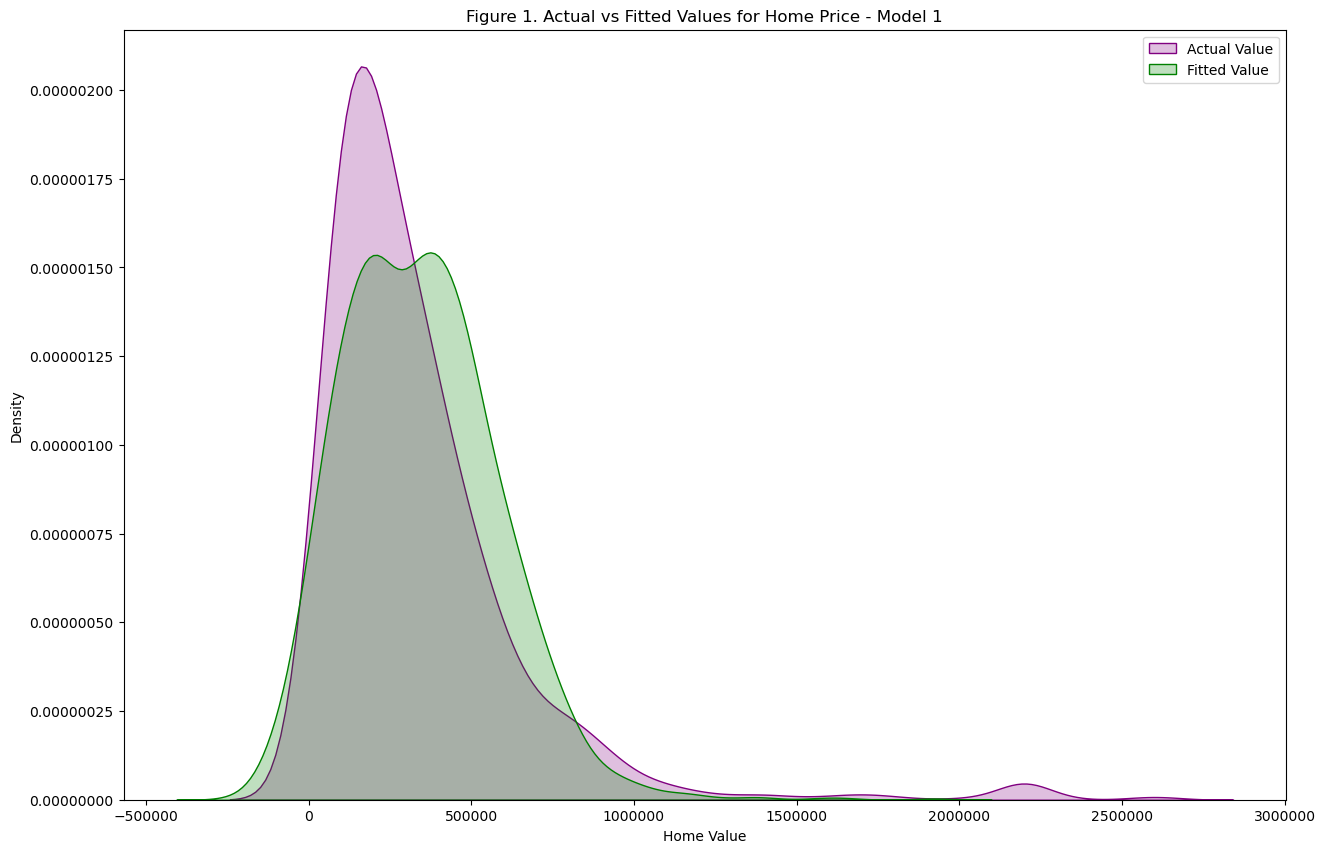

In [136]:
# Plotting Actual vs Fitted Values for Home Price
#Ignoring warnings
import warnings #Import to ignore warnings to make clean visualization
warnings.simplefilter(action='ignore', category=FutureWarning)

#Plotting
plt.figure(figsize=(15, 10))
ax1 = sns.kdeplot(data=y_test.squeeze(), fill=True, bw_method=0.25, color="purple", label="Actual Value")
sns.kdeplot(data=predicted_price.squeeze(), fill=True, bw_method=0.25, color="g", label="Fitted Value", ax=ax1)
plt.title('Figure 1. Actual vs Fitted Values for Home Price - Model 1')
plt.xlabel('Home Value')
plt.ylabel('Density')
plt.legend()
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

In [137]:
#Conducting variable selection using RFE (Recursive feature elimination)
from sklearn.feature_selection import RFE #Import necessary module for RFE
#Transforming data using RFE
rfe_selector = RFE(lm, n_features_to_select=7, step=1)  #Use the lm model, select 7 features, remove one variable each time.
#Perform the selector on the training data.
rfe_selector = rfe_selector.fit(X_train, y_train)
# Report your results
selector_report = pd.concat([pd.DataFrame(X_train.columns), pd.DataFrame(np.transpose(rfe_selector.support_)), pd.DataFrame(np.transpose(rfe_selector.ranking_))], axis=1)
selector_report.columns = ["variables", "valuable?", "ranking"]
selector_report

,variables,valuable?,ranking
0,msa360,True,1
1,msa520,False,28
2,msa875,True,1
3,msa1120,False,5
4,msa1600,False,29
5,msa1680,False,13
6,msa1920,False,16
7,msa2160,False,15
8,msa2800,False,10
9,msa3360,False,19


In [138]:
#Creating a data frame for coefficents
coefficients2 = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(rfe_selector.estimator_.coef_))], axis = 1)
#Creating Column Names
coefficients2.columns = ["variables", "RFE 1 Coeff."]
# create a constant term data frame
constant_term2 = {"variables": ["constant"], "RFE 1 Coeff.": [rfe_selector.estimator.intercept_[0]]}
constant_df2 = pd.DataFrame(constant_term2)
#Creating Table
table2 = pd.concat([coefficients2, constant_df2])
table2.set_index("variables", inplace=True)
table2

,RFE 1 Coeff.
variables,
msa360,416404.85
msa520,217773.12
msa875,253467.46
msa1120,321092.68
msa1600,307260.87
msa1680,531727.62
msa1920,387990.16
msa2160,NaN
msa2800,NaN


In [139]:
##Testing the 2nd New Model
#New features dataframe containing only selected features through RFE
X_RFE = X_test[X_test.columns[rfe_selector.support_]]
lm.fit(X_RFE, y_test)

LinearRegression()

In [140]:
#Making predictions
predicted_price2 = lm.predict(X_RFE)

In [141]:
#Evaluating predictions
mean_absolute_error2 = mae(y_test, predicted_price2)
mean_squared_error2 = mse(y_test, predicted_price2)
root_mean_squared_error2 = mean_squared_error2**0.5
r_squared2 = r2_score(y_test, predicted_price2)
adj_r2 = 1 - (1-r_squared2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("MAE: {:.3f}".format(mean_absolute_error2))
print("MSE: {:.3f}".format(mean_squared_error2))
print("RMSE: {:.3f}".format(root_mean_squared_error2))
print("R-squared: {:.3f}".format(r_squared2))
print("adjusted R-squared: {:.3f}".format(adj_r2))


MAE: 184334.379
MSE: 90038470855.664
RMSE: 300064.111
R-squared: 0.136
adjusted R-squared: 0.116


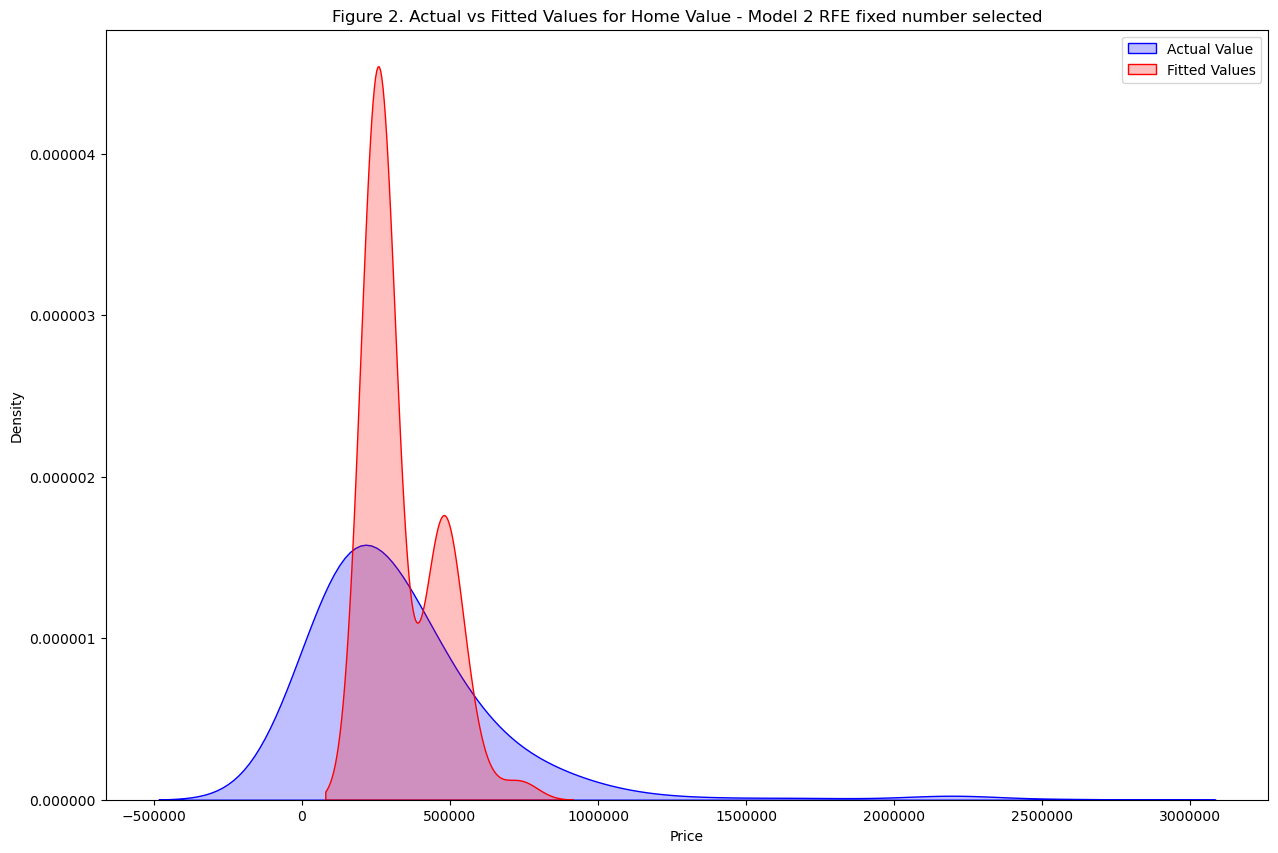

In [142]:
# Plotting Actual vs Fitted Values for Home Price - Model 2
#Ignoring warnings
import warnings #Import to ignore warnings to make clean visualization
warnings.simplefilter(action='ignore', category=FutureWarning)
#Plotting
plt.figure(figsize=(15, 10))
#set up the kernel density plot. Note the first parameter is the data, the second is one which shades the area under the curve,
#the bw_method is a smoothing parameter, 
ax2 = sns.kdeplot(data = y_test.squeeze(), fill = True, bw_method = 0.5, color = "b", label="Actual Value")
#We need this plot the predicted_hours
sns.kdeplot(data = predicted_price2.squeeze(),fill = True, bw_method = 0.5,  color = "r", label="Fitted Values" , ax=ax2)
#Adding the labels
plt.title('Figure 2. Actual vs Fitted Values for Home Value - Model 2 RFE fixed number selected')
plt.xlabel('Price')
plt.ylabel('Density')
#Adding the legend
plt.legend()
plt.ticklabel_format(style='plain', axis='y') # to prevent scientific notation.
plt.ticklabel_format(style='plain', axis='x') # to prevent scientific notation.
plt.show()

In [143]:
#Number of features
nof_list=np.arange(1,len(X_test.columns))            
high_score=0
#Variable to store the optimum features
nof=0
option_list = []
adjscore_list =[]
for n in range(len(nof_list)):
    lm = LinearRegression()
    rfe_selector2 = RFE(lm,n_features_to_select=nof_list[n])
    rfe_selector2 = rfe_selector2.fit(X_train,y_train)
    X_rfe_train = X_train[X_train.columns[rfe_selector2.support_]]
    lm.fit(X_rfe_train,y_train)
    score = lm.score(X_rfe_train,y_train)
    adjscore = 1 - (1-score)*(len(y_train)-1)/(len(y_train)-X_rfe_train.shape[1]-1)
    option_list.append(nof)
    adjscore_list.append(adjscore)
    if(adjscore>high_score):
        high_score = adjscore
        nof = nof_list[n]

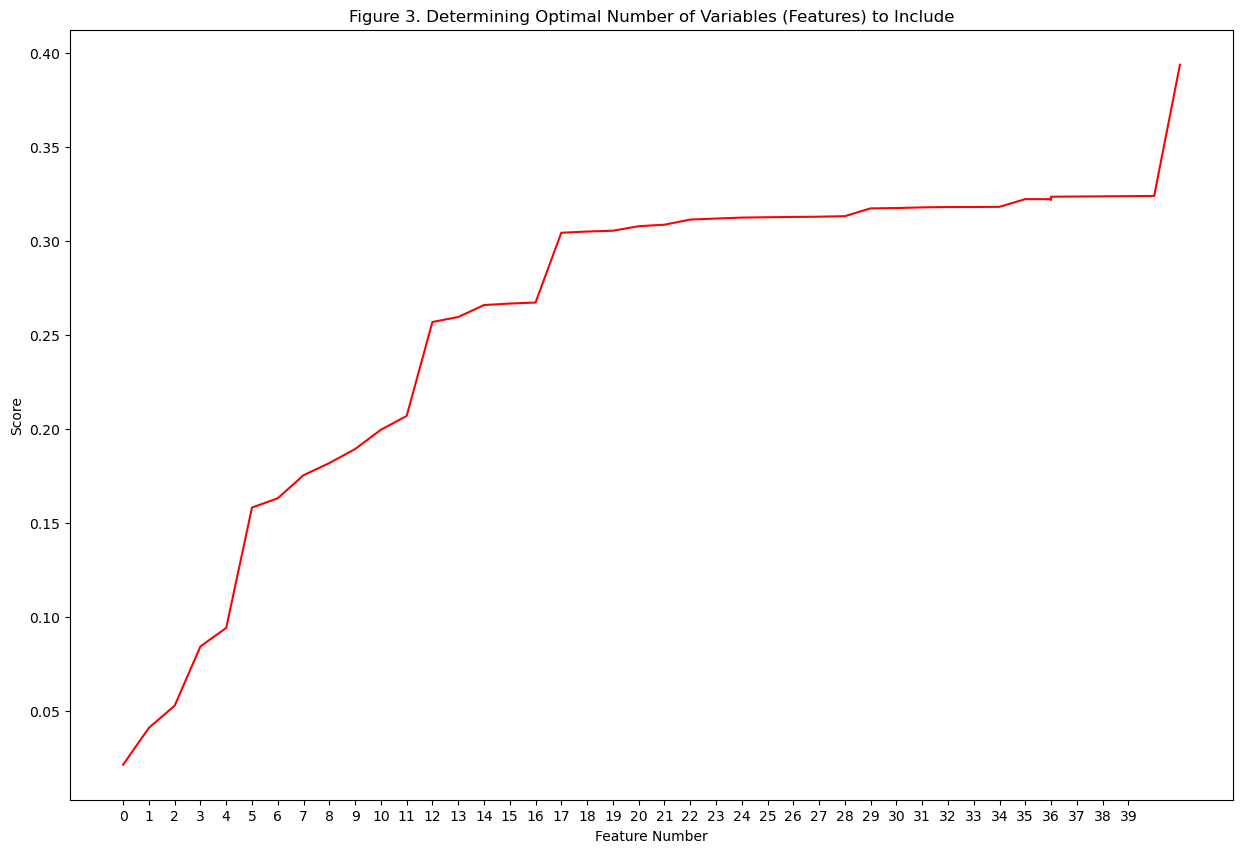

In [144]:
#Plotting to figure out optimal number of variables to include
plt.figure(figsize=(15, 10))
plt.plot(option_list, adjscore_list, color = "r")
plt.title('Figure 3. Determining Optimal Number of Variables (Features) to Include')
plt.xlabel('Feature Number')
plt.ylabel('Score')
plt.xticks(np.arange(0, 40, 1))
plt.show()


In [145]:
selector_report2 = pd.concat([pd.DataFrame(X_train.columns), pd.DataFrame(np.transpose(rfe_selector2.support_)), pd.DataFrame(np.transpose(rfe_selector2.ranking_))], axis=1)
selector_report2.columns = ["variables", "valuable?", "ranking"]
selector_report2

,variables,valuable?,ranking
0,msa360,True,1
1,msa520,True,1
2,msa875,True,1
3,msa1120,True,1
4,msa1600,True,1
5,msa1680,True,1
6,msa1920,True,1
7,msa2160,True,1
8,msa2800,True,1
9,msa3360,True,1


In [146]:
#Coefficients for third model approach
coefficients3 = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(rfe_selector2.estimator_.coef_))], axis = 1)
coefficients3.columns = ["variables", "RFE 2 Coeff."]
#Creating constant term data frame
constant_term3 = {"variables": ["constant"], "RFE 2 Coeff.": [rfe_selector2.estimator.intercept_[0]]}
constant_df3 = pd.DataFrame(constant_term3)
#Creating table
table3 = pd.concat([coefficients3, constant_df3])
table3.set_index("variables", inplace=True)
table3

,RFE 2 Coeff.
variables,
msa360,292732.27
msa520,-86016.36
msa875,197527.29
msa1120,128789.97
msa1600,8914.34
msa1680,-160536.71
msa1920,-144293.94
msa2160,-119685.73
msa2800,-267949.28


In [147]:
##Testing the 3rd New Model
#New features dataframe containing only selected features through RFE
X_rfe_test = X_test[X_test.columns[rfe_selector2.support_]]
lm.fit(X_rfe_test, y_test)

LinearRegression()

In [148]:
#Making predictions
predicted_price3 = lm.predict(X_rfe_test)

In [149]:
#Evaluating Predictions
mean_absolute_error3 = mae(y_test, predicted_price3)
mean_squared_error3 = mse(y_test, predicted_price3)
root_mean_squared_error3 = mean_squared_error3**0.5
r_squared3 = r2_score(y_test, predicted_price3)
adj_r3 = 1 - (1-r_squared3)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("MAE: {:.3f}".format(mean_absolute_error3))
print("MSE: {:.3f}".format(mean_squared_error3))
print("RMSE: {:.3f}".format(root_mean_squared_error3))
print("R-squared: {:.3f}".format(r_squared3))
print("adjusted R-squared: {:.3f}".format(adj_r3))

MAE: 144478.359
MSE: 59016813252.768
RMSE: 242933.763
R-squared: 0.433
adjusted R-squared: 0.421


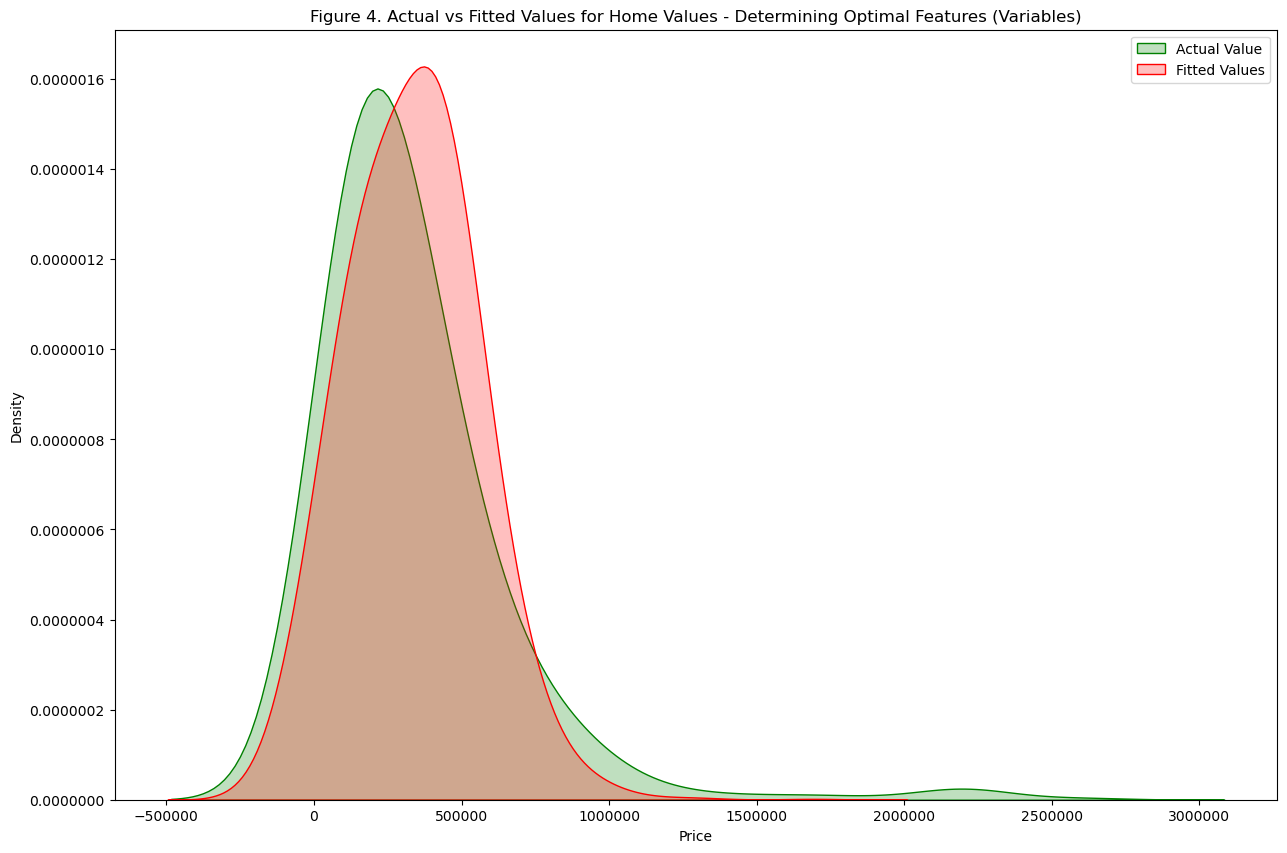

In [150]:
#Plotting Actual vs Fitted Values for Home Price with Optimal Feature Determination

#Ignoring warnings
import warnings #Import to ignore warnings to make clean visualization
warnings.simplefilter(action='ignore', category=FutureWarning)

#Plotting
plt.figure(figsize=(15, 10))
#Setting up the kernel density plot. 
ax2 = sns.kdeplot(data = y_test.squeeze(), fill = True, bw_method = 0.5, color = "green", label="Actual Value")
#Plot for the predicted_hours
sns.kdeplot(data = predicted_price3.squeeze(), fill = True, bw_method = 0.5, color = "red", label="Fitted Values" , ax=ax2)
#Adding the labels
plt.title('Figure 4. Actual vs Fitted Values for Home Values - Determining Optimal Features (Variables)')
plt.xlabel('Price')
plt.ylabel('Density')
#Adding the legend
plt.legend()
plt.ticklabel_format(style='plain', axis='y') # to prevent scientific notation.
plt.ticklabel_format(style='plain', axis='x') # to prevent scientific notation.
plt.show()

In [151]:
# #### Using LASSO Regression
from sklearn.linear_model import Lasso #Importing Lasso model data
lasso = Lasso(alpha=100)
# Fitting the Lasso model.
lasso.fit(X_train, y_train)
# Create the model score
lasso.score(X_test, y_test), lasso.score(X_train, y_train)
#Visualization of basic coefficients
lasso.coef_

array([ 2.89327967e+05, -6.31379354e+04,  1.67500478e+05,  1.18746123e+05,
        1.03704445e+04, -1.32833800e+05, -1.14363873e+05, -9.86995396e+04,
       -2.13544263e+05, -5.36607885e+04, -4.47461031e+04,  2.28468347e+05,
        0.00000000e+00, -2.01659433e+04, -2.12212285e+04,  1.17649697e+05,
        3.17970973e+05,  7.00933990e+04, -8.47277820e+04,  2.60023214e+05,
        7.12624342e+03, -1.76262822e+05, -9.86331804e+04, -2.16050078e+04,
       -7.65090983e+04, -9.16052320e+04,  1.59315685e+05,  4.35853432e+05,
        2.87281016e+05,  1.49303240e+05, -6.11041943e+04,  1.55892296e+05,
        3.54247234e+04, -2.12362062e+03, -1.68260472e+04,  9.89580698e-01,
       -1.92472315e+04,  1.83882937e+04, -7.85599119e+02,  3.96142285e+03,
        1.17483810e+02,  5.41246406e+01, -0.00000000e+00])

In [152]:
#Coefficients for LASSO approach
coefficients4 = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(lasso.coef_))], axis = 1)
coefficients4.columns = ["variables", "Lasso Coeff."]
#Creating a constant term data frame
constant_term4 = {"variables": ["constant"], "Lasso Coeff.": [lasso.intercept_[0]]}
constant_df4 = pd.DataFrame(constant_term4)
#Creating table
table4 = pd.concat([coefficients4, constant_df4])
table4.set_index("variables", inplace=True)
table4

,Lasso Coeff.
variables,
msa360,289327.97
msa520,-63137.94
msa875,167500.48
msa1120,118746.12
msa1600,10370.44
msa1680,-132833.80
msa1920,-114363.87
msa2160,-98699.54
msa2800,-213544.26


In [153]:
#Making predictions
predicted_price4 = lasso.predict(X_test)

In [154]:
#Evaluating predictions
mean_absolute_error4 = mae(y_test, predicted_price4)
mean_squared_error4 = mse(y_test, predicted_price4)
root_mean_squared_error4 = mean_squared_error4**0.5
r_squared4 = r2_score(y_test, predicted_price4)
adj_r4 = 1 - (1-r_squared4)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("MAE: {:.3f}".format(mean_absolute_error4))
print("MSE: {:.3f}".format(mean_squared_error4))
print("RMSE: {:.3f}".format(root_mean_squared_error4))
print("R-squared: {:.3f}".format(r_squared4))
print("adjusted R-squared: {:.3f}".format(adj_r4))

MAE: 141423.172
MSE: 56317705978.717
RMSE: 237313.518
R-squared: 0.459
adjusted R-squared: 0.447


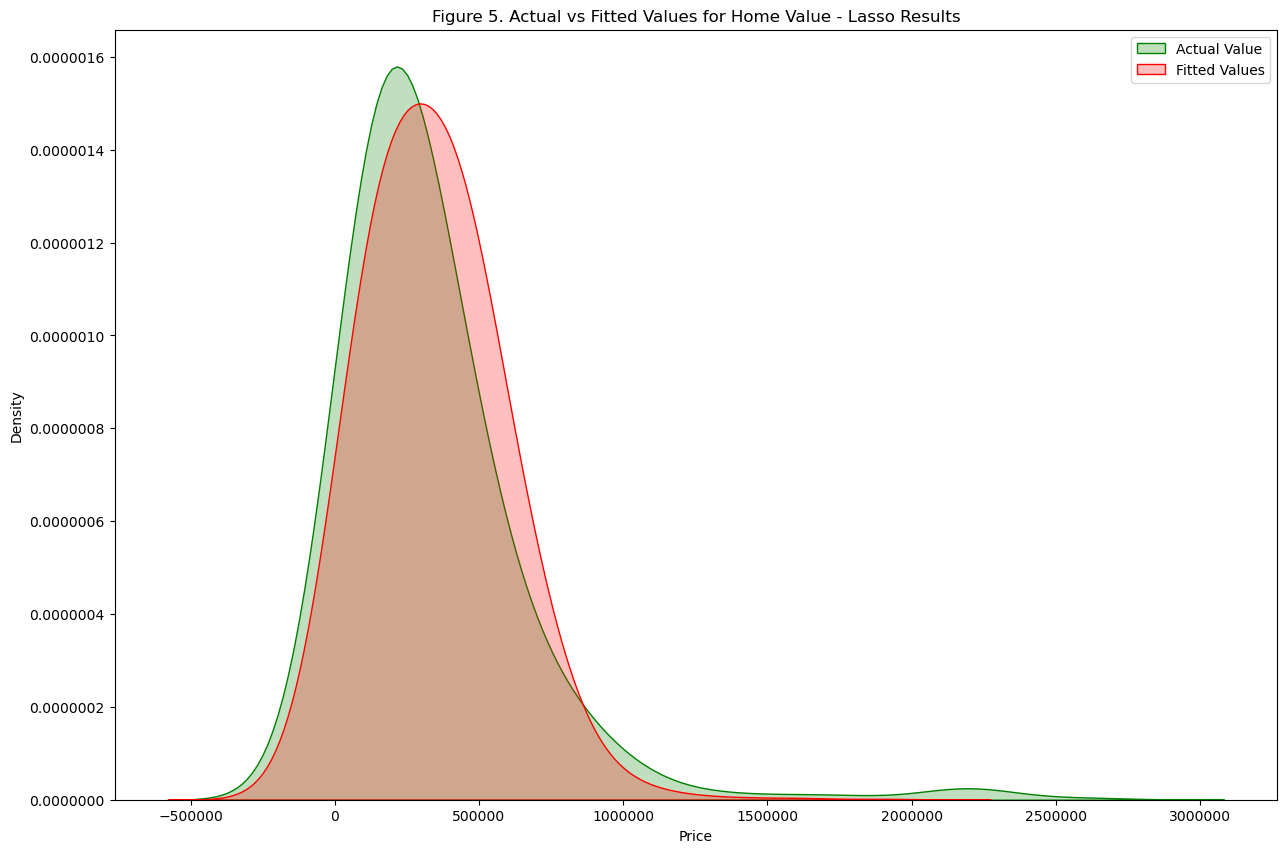

In [155]:
#Plotting Actual vs Fitted Values for Home Price for LASSO

#Ignoring warnings
import warnings #Import to ignore warnings to make clean visualization
warnings.simplefilter(action='ignore', category=FutureWarning)

#Plotting
plt.figure(figsize=(15, 10))
#set up the kernel density plot. Note the first parameter is the data, the second is one which shades the area under the curve,
#the bw_method is a smoothing parameter, 
ax2 = sns.kdeplot(data = y_test.squeeze(), fill = True, bw_method = 0.5, color = "green", label="Actual Value")
#We need this plot the predicted_hours
sns.kdeplot(data = predicted_price4.squeeze(), fill = True, bw_method = 0.5, color = "red", label="Fitted Values" , ax=ax2)
#Adding the labels
plt.title('Figure 5. Actual vs Fitted Values for Home Value - Lasso Results')
plt.xlabel('Price')
plt.ylabel('Density')
#Adding the legend
plt.legend()
plt.ticklabel_format(style='plain', axis='y') # to prevent scientific notation.
plt.ticklabel_format(style='plain', axis='x') # to prevent scientific notation.
plt.show()

#### Combining results

In [156]:
# Create a Large Data Frame for All Models
Coeff_table = pd.concat([table, table2, table3, table4], axis=1) #This concatentates all previous results
Coeff_table.reset_index(inplace=True) #This resets the index for subsequent efforts at merging data

In [157]:
# Creating a dataframe with the performance metrics.
## Creating lists with the results of each model.
L1 = [mean_absolute_error, mean_squared_error, root_mean_squared_error, r_squared, adj_r]
L2 = [mean_absolute_error2, mean_squared_error2, root_mean_squared_error2, r_squared3, adj_r2]
L3 = [mean_absolute_error3, mean_squared_error3, root_mean_squared_error3, r_squared3, adj_r3]
L4 = [mean_absolute_error4, mean_squared_error4, root_mean_squared_error4, r_squared3, adj_r4]

In [158]:
## Creating column labels and make a list of lists of the four results.
L5 = ["MAE", "MSE", "RMSE", "R2", "ADJ_R"]
L6 = [L1, L2, L3, L4]
# Convert L6 into a dataframe.
Perf_df = pd.DataFrame(L6, columns = L5 )
# Transposing so this dataframe is lined up with the coefficients data frame.
Perf_dfT = Perf_df.transpose()
Perf_dfT.reset_index(inplace=True)
# Making sure that the column labels are the same between Perf_dfT and that of Coeff_table
Perf_dfT.rename(columns={"index":"variables", 0:"Model 1 Coeff.", 1:"RFE 1 Coeff.", 2:"RFE 2 Coeff.", 3:"Lasso Coeff."}, inplace=True)

In [159]:
# Appending the Performance Metrics to a Table
Coef_fin = pd.concat([Coeff_table, Perf_dfT])
#Coef_fin = Coeff_table.append(Perf_dfT, ignore_index=True)
Coef_fin.set_index("variables", inplace=True)
Coef_fin

,Model 1 Coeff.,RFE 1 Coeff.,RFE 2 Coeff.,Lasso Coeff.
variables,,,,
msa360,290228.49,416404.85,292732.27,289327.97
msa520,-72730.65,217773.12,-86016.36,-63137.94
msa875,172430.76,253467.46,197527.29,167500.48
msa1120,119538.40,321092.68,128789.97,118746.12
msa1600,8882.09,307260.87,8914.34,10370.44
msa1680,-140897.53,531727.62,-160536.71,-132833.80
msa1920,-123007.99,387990.16,-144293.94,-114363.87
msa2160,-103443.54,NaN,-119685.73,-98699.54
msa2800,-225239.64,NaN,-267949.28,-213544.26


In [160]:
#Exporting results to a csv to format for a document.
Coef_fin.to_csv('Model Results.csv')